In [96]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import preprocessing

msft = yf.Ticker('MSFT')
vix = yf.Ticker('^VIX')

hist = msft.history(period='20y', interval="1wk").drop(['Stock Splits', 'Dividends'], axis=1)
# hist['Volatility'] = list(vix.history(period='20y', interval='1wk').Open)
returns = hist.Open - hist.Close
hist.drop(hist.index[0], inplace=True)
returns.drop(returns.index[-1], inplace=True)
hist['Returns'] = list(returns)
hist.tail()

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist.drop['Volatility'])


,Open,High,Low,Close,Volume,Volatility,Returns
Date,,,,,,,
2024-06-17 00:00:00-04:00,442.589996,450.940002,440.720001,449.779999,92266100,13.07,-17.869995
2024-06-24 00:00:00-04:00,449.799988,456.170013,446.410004,446.950012,92336800,13.85,-7.190002
2024-07-01 00:00:00-04:00,448.660004,468.350006,445.660004,467.559998,57575700,12.98,2.849976
2024-07-08 00:00:00-04:00,466.549988,467.700012,450.649994,453.549988,87788100,12.91,-18.899994
2024-07-15 00:00:00-04:00,453.299988,457.260010,439.179993,443.519989,75124578,12.78,13.000000


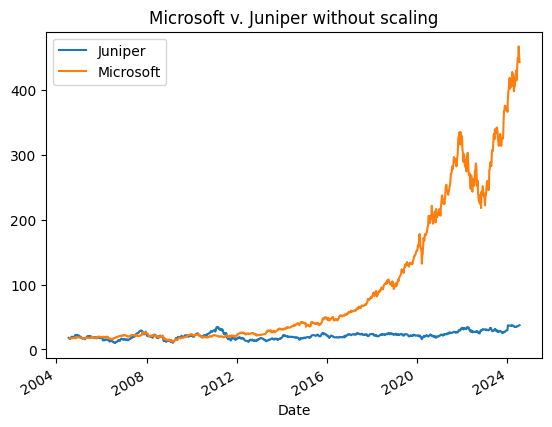

In [154]:
aapl = yf.Ticker('JNPR')
hist_a = aapl.history(period='20y', interval="1wk").drop(['Stock Splits', 'Dividends'], axis=1)
hist_a.drop(hist.index[0], inplace=True)
hist_a['Microsoft Close'] =  hist.Close
hist_a.rename(columns={"Close": "Juniper", "Microsoft Close": "Microsoft"}, inplace=True)
hist_a[['Juniper', 'Microsoft']].plot()
plt.title("Microsoft v. Juniper without scaling")
plt.xlabel("Date")
plt.show()


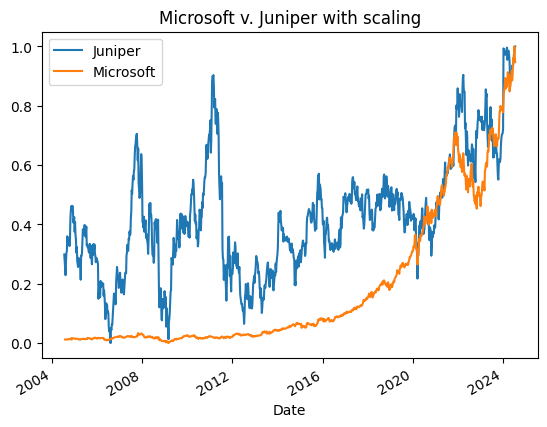

In [156]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist_a[['Juniper', 'Microsoft']])
p = pd.DataFrame(x_scaled)
p.rename(columns={0: "Juniper", 1: "Microsoft"}, inplace=True)
p.set_index(hist_a.index, inplace=True)
p.plot()
plt.title("Microsoft v. Juniper with scaling")
plt.xlabel("Date")
plt.show()

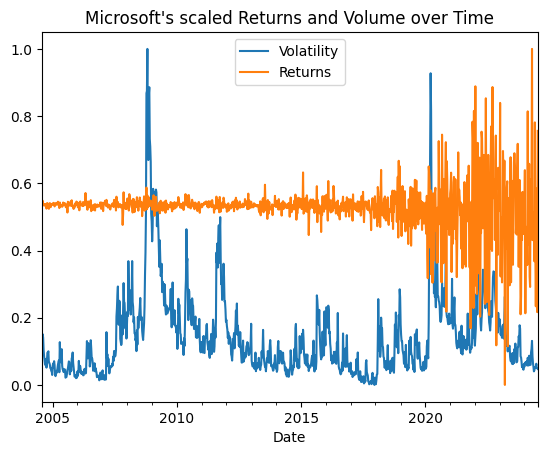

In [158]:
from sklearn import preprocessing
import pandas as pd

hist[['Volatility', 'Returns']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist[['Volatility', 'Returns']])
p = pd.DataFrame(x_scaled)
p.set_index(hist.index, inplace=True)
p.rename(columns={0: "Volatility", 1: "Returns"}, inplace=True)
p.plot()
plt.title("Microsoft's scaled Returns and Volume over Time")
plt.xlabel("Date")
plt.show()

In [160]:
index = hist.index
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist)
p = pd.DataFrame(x_scaled)
p.rename(columns={0: "Open", 1: "High", 2:"Low", 3:"Close", 4:"Volume", 5:"Volatility", 6:"Returns"}, inplace=True)
p.set_index(index, inplace=True)
p.tail()

,Open,High,Low,Close,Volume,Volatility,Returns
Date,,,,,,,
2024-06-17 00:00:00-04:00,0.947370,0.961833,0.977411,0.961026,0.046480,0.051816,0.234046
2024-06-24 00:00:00-04:00,0.963207,0.973299,0.990355,0.954822,0.046566,0.063011,0.414626
2024-07-01 00:00:00-04:00,0.960703,1.000000,0.988649,1.000000,0.004474,0.050524,0.584385
2024-07-08 00:00:00-04:00,1.000000,0.998575,1.000000,0.969290,0.041058,0.049519,0.216630
2024-07-15 00:00:00-04:00,0.970895,0.975688,0.973908,0.947304,0.025724,0.047653,0.756004


In [161]:
# from sklearn.linear_model import LinearRegression
# lr = sklearn.Linear

import plotly.express as px

px.scatter(hist, x='Close', y='Returns', trendline='ols', trendline_color_override='red', width=1200)

In [109]:
px.scatter(hist, x='Volume', y='Returns', trendline='ols', trendline_color_override='red', width=1200)

In [141]:
px.scatter(hist, x='Volatility', y='Returns', trendline='ols', trendline_color_override='red', width=1200)